## Libraries import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['agg.path.chunksize'] = 10000

## Load dataset

In [2]:
df = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Check missing values

In [4]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

## Drop leak columns

In [5]:
column_drop = [
    'acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
    'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 
    'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'funded_amnt', 
    'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 'initial_list_status', 
    'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct', 'last_pymnt_amnt', 'last_pymnt_d', 
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 
    'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 
    'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 
    'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'out_prncp', 
    'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 
    'tot_coll_amt', 'tot_cur_bal', 'last_fico_range_high', 'last_fico_range_low', 'url', 'id', 'title', 
    'addr_state', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 
    'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 
    'total_rev_hi_lim'
] # List of columns to drop

# Drop columns
df_drop = df.drop(columns=column_drop)
dropped_columns_count = len(column_drop)

print("After Dropping, the new DataFrame contains {} features and lost a total of {} features".format(df_drop.shape[1], dropped_columns_count))

After Dropping, the new DataFrame contains 86 features and lost a total of 65 features


In [6]:
df_drop.shape

(2260701, 86)

## Remove columns with 1 unique value

In [7]:
# Finding unique values in each feature
nunique_value = df_drop.nunique()

# Finding columns with only one unique value
single_value_cols = nunique_value[nunique_value == 1].index.tolist()

print(single_value_cols)

['policy_code', 'hardship_type', 'deferral_term', 'hardship_length']


In [8]:
# Drop columns with only one unique value
df_drop = df_drop.drop(columns = single_value_cols)

In [9]:
df_drop.shape

(2260701, 82)

## Remove missing data

In [10]:
# Calculate percentage of missing values for each column
missing_data = df_drop.isnull().sum() / len(df_drop) * 100

# Filter columns with missing values less than 50%
missing_variable = missing_data[missing_data < 50].index.tolist()

# Columns with missing values more than 50%
drop_columns = list(set(df_drop.columns) - set(missing_variable))

# Drop columns based on missing data more than 50%
df_drop_nan = df_drop.drop(columns=drop_columns)

df_drop_nan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,36.0,3.0,3.0,722.0,34.0,3.0,1.0,4.0,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,73.0,2.0,3.0,6472.0,29.0,0.0,0.0,6.0,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,73.0,0.0,2.0,2081.0,65.0,2.0,5.0,1.0,5.0,0.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,...,70.0,1.0,1.0,6987.0,45.0,0.0,1.0,0.0,1.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,84.0,4.0,7.0,9702.0,78.0,2.0,1.0,3.0,6.0,0.0


In [11]:
df_drop_nan.shape

(2260701, 41)

## Filter out ongoing payment loans

In [12]:
df_final = df_drop_nan.loc[(df_drop_nan['loan_status'] == 'Charged Off') | (df_drop_nan['loan_status'] == 'Fully Paid')]

In [13]:
pd.set_option("large_repr", "info")
df_final

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 41 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  object 
 2   int_rate              1345310 non-null  float64
 3   installment           1345310 non-null  float64
 4   grade                 1345310 non-null  object 
 5   sub_grade             1345310 non-null  object 
 6   emp_title             1259525 non-null  object 
 7   emp_length            1266799 non-null  object 
 8   home_ownership        1345310 non-null  object 
 9   annual_inc            1345310 non-null  float64
 10  verification_status   1345310 non-null  object 
 11  issue_d               1345310 non-null  object 
 12  loan_status           1345310 non-null  object 
 13  purpose               1345310 non-null  object 
 14  zip_code              1345309 non-null  object 
 15  dti                   1344936 non-null  float64
 16  earliest_cr_line      1345310 non-null  object 
 17  fico_range_low        1345310 non-null  float64
 18  fico_range_high       1345310 non-null  float64
 19  open_acc              1345310 non-null  float64
 20  pub_rec               1345310 non-null  float64
 21  revol_bal             1345310 non-null  float64
 22  revol_util            1344453 non-null  float64
 23  total_acc             1345310 non-null  float64
 24  application_type      1345310 non-null  object 
 25  open_acc_6m           537597 non-null   float64
 26  open_act_il           537598 non-null   float64
 27  open_il_12m           537598 non-null   float64
 28  open_il_24m           537598 non-null   float64
 29  mths_since_rcnt_il    523382 non-null   float64
 30  total_bal_il          537598 non-null   float64
 31  il_util               465016 non-null   float64
 32  open_rv_12m           537598 non-null   float64
 33  open_rv_24m           537598 non-null   float64
 34  max_bal_bc            537598 non-null   float64
 35  all_util              537545 non-null   float64
 36  inq_fi                537598 non-null   float64
 37  total_cu_tl           537597 non-null   float64
 38  inq_last_12m          537597 non-null   float64
 39  mort_acc              1298029 non-null  float64
 40  pub_rec_bankruptcies  1344613 non-null  float64
dtypes: float64(28), object(13)
memory usage: 431.1+ MB

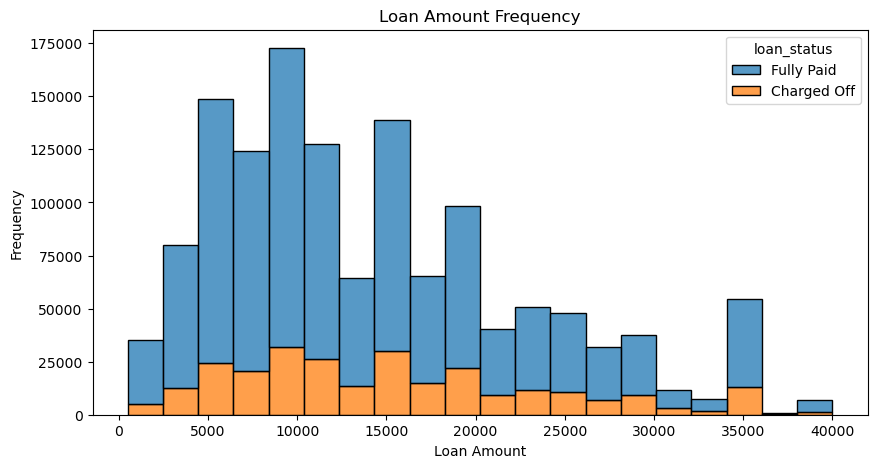

In [14]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final, x="loan_amnt", bins=20, hue="loan_status", multiple="stack")
plt.title("Loan Amount Frequency")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

## Conclusion
From the graph, the larger the loan amount, the higher the chance being charged off.

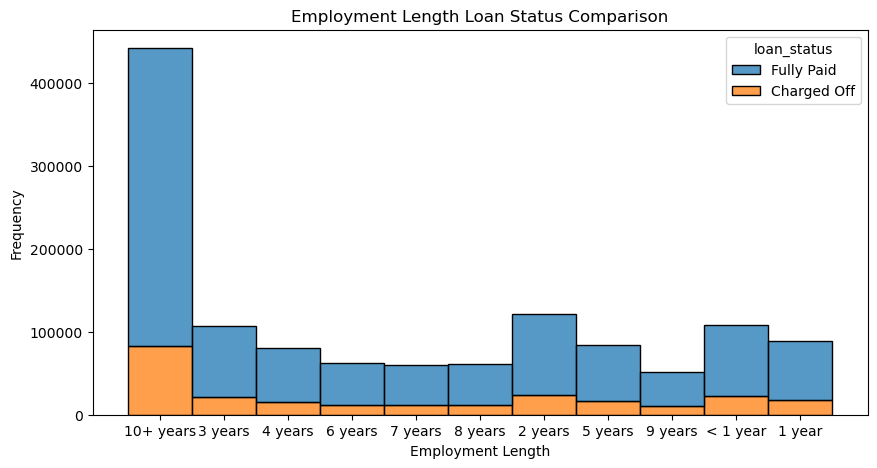

In [16]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final, x="emp_length", hue="loan_status", multiple="stack")
plt.title("Employment Length Loan Status Comparison")
plt.xlabel("Employment Length")
plt.ylabel("Frequency")
plt.show()

## Employment length sorted (manually)
(manually as in I edited in paint because I dont know how to sort it according to years).

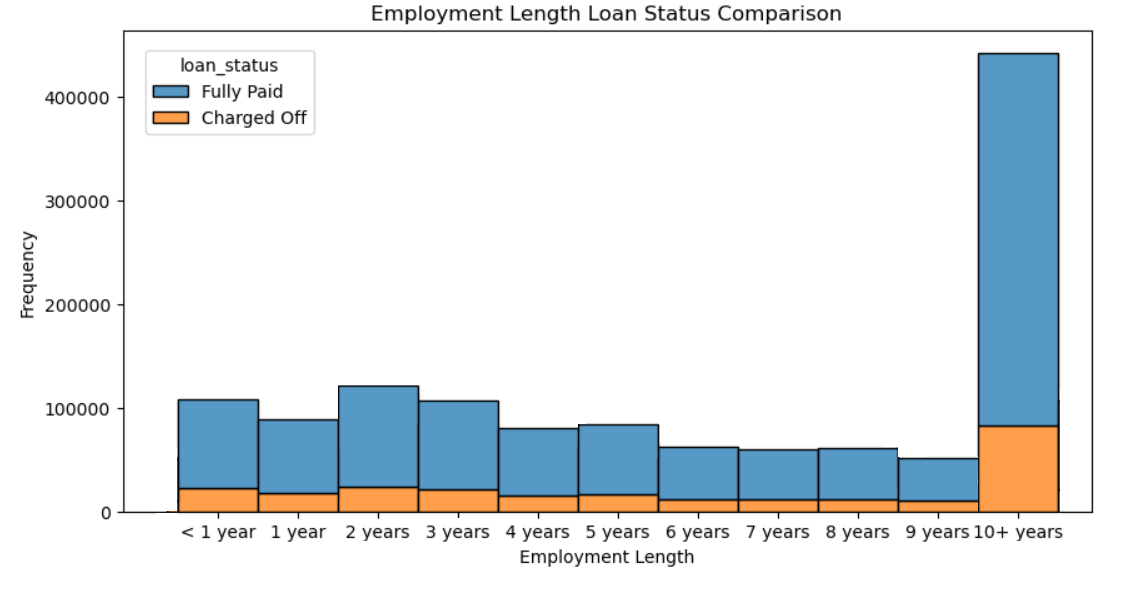

## Observation:
The likelihood of being charged off for all employment length are around 17% to 20% of all loans. No major fluctuations for any particular year.

## Conclusion:
There are no significant relationship between employment length and borrower being charged off. This is a possible point of interest to look into, as previous studies have treated 'employment length of borrowers' to be one of the determinants of borrowers' default, which differs from the information obtained from the graph. As of currently, I am unable to identify any strong relationship between employment length and risk of default, based on the graph above. 

## Personal note:
With reference to Rini's graph for employment length and loan status, we see a different in trend where her graph shows an increase up until 4-6 years then a stark decrease from 6-8 years, whereas in this graph the trend is more smoothed out (with exception of 10+ years). I believe this is due to the difference in grouping. Both graphs appear to present different information; it could be worthwhile to look into it to see if we can identify any interesting information.

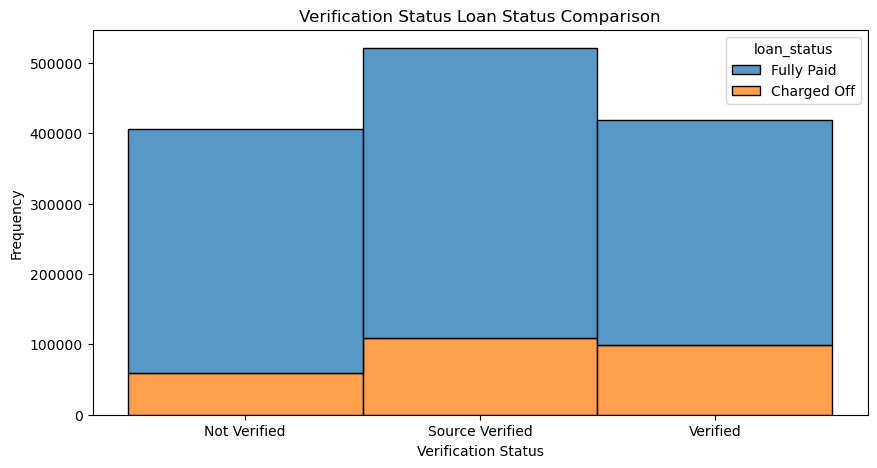

In [17]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final, x="verification_status", bins=20, hue="loan_status", multiple="stack")
plt.title("Verification Status Loan Status Comparison")
plt.xlabel("Verification Status")
plt.ylabel("Frequency")
plt.show()

## Conclusion:
Based on the graph above, verified borrowers are more likely to be charged off.

## Inference:
From research by Xu et. al (2021), they noted that individuals who are willing to provide personal information (unverified) tend to have a greater probability of default. This is consistent with the information obtained from the graph, and therefore we may conclude that verification status is a significant feature to include for the prediction borrowers' default risk. 

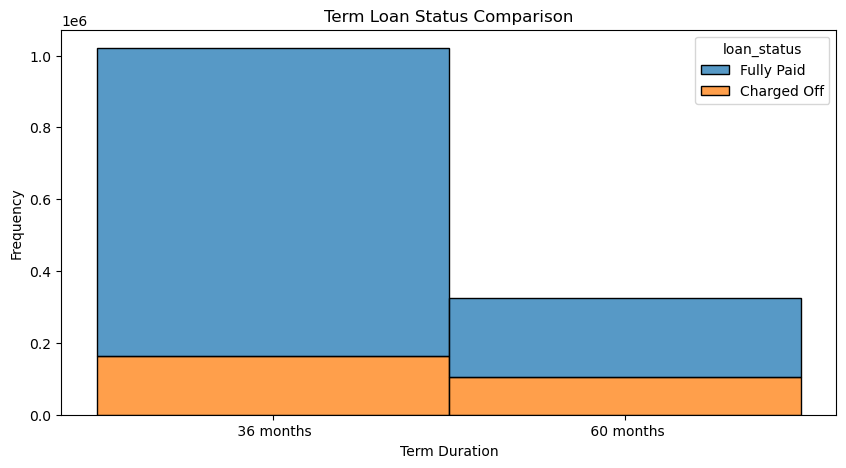

In [18]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final, x="term", hue="loan_status", multiple="stack")
plt.title("Term Loan Status Comparison")
plt.xlabel("Term Duration")
plt.ylabel("Frequency")
plt.show()

## Conclusion:
From the graph above, borrower with 60-month term loan is more likely to be charged off.

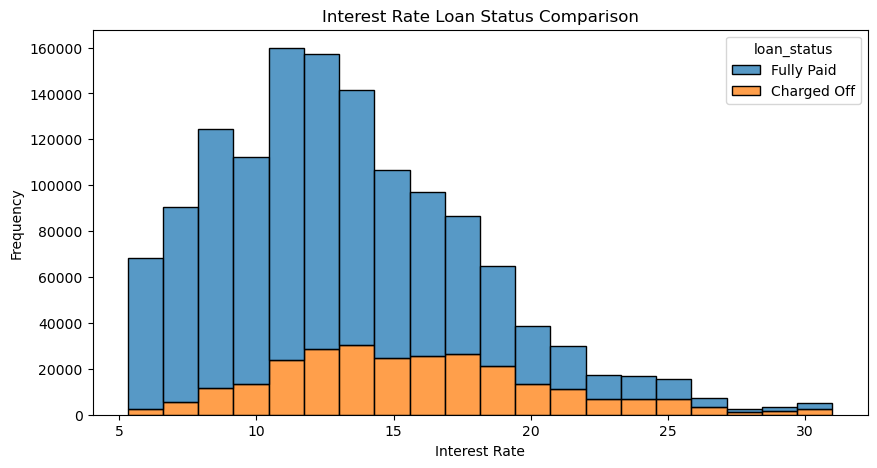

In [19]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final, x="int_rate", bins=20, hue="loan_status", multiple="stack")
plt.title("Interest Rate Loan Status Comparison")
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.show()

## Conclusion:
Based on the graph above, the higher the interest rate, the higher the probability of being charged off. The trend appears to be very strong and we may conclude that interest rate is a significant feature in predicting borrower's default risk.

<Figure size 1000x500 with 0 Axes>

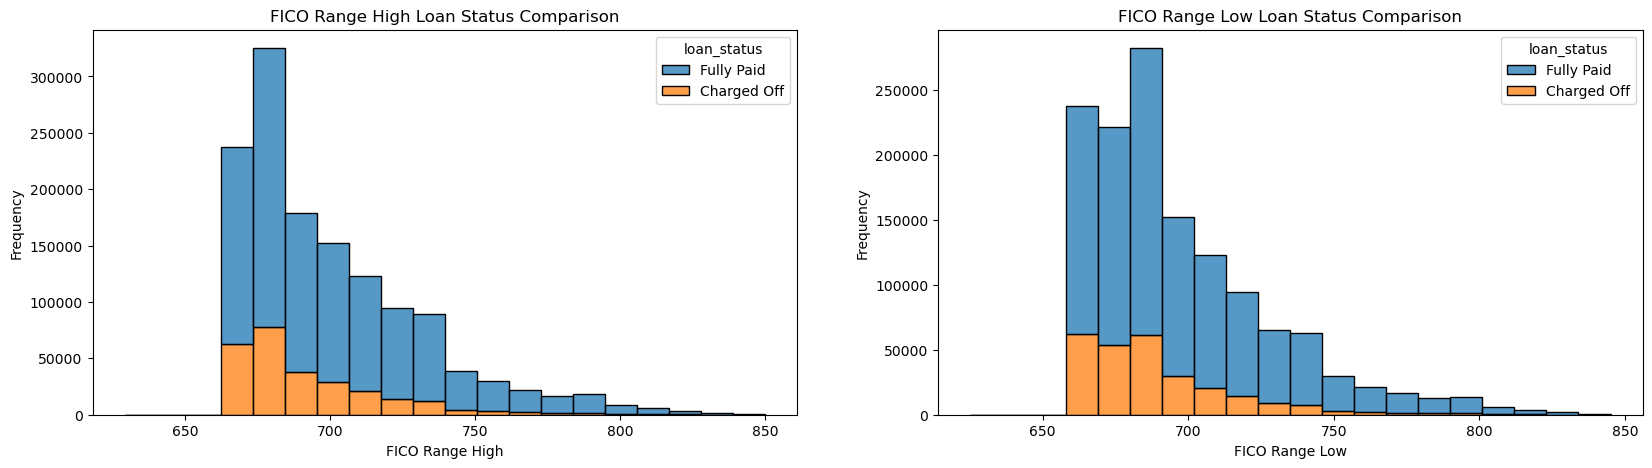

In [20]:
plt.figure(figsize=(10, 5))

plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(df_final, x="fico_range_low", bins=20, hue="loan_status", multiple="stack")
plt.title("FICO Range Low Loan Status Comparison")
plt.xlabel("FICO Range Low")
plt.ylabel("Frequency")
plt.subplot(1, 2, 1)

sns.histplot(df_final, x="fico_range_high", bins=20, hue="loan_status", multiple="stack")
plt.title("FICO Range High Loan Status Comparison")
plt.xlabel("FICO Range High")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)

plt.show()

## Observation:
There is a difference in the amount of borrowers charged off for high FICO and low FICO range.  

## Inference:
The observation is likely to be attributed to the grouping of the dataset due to the higher and lower boundary limits set for the credit score, which resulted in different groups and therefore the difference in presentation. 

However, the trend remains that the higher the credit score, the less likely the borrowers are going to default for both graphs, and therefore the difference caused grouping will be ignored in this case. 

## Conclusion:
In essence, the higher the FICO score, the less likely the borrowers will be charged off. We may conclude that there is a strong correlation between credit score and default risk, as per numerous previous studies (see literature review).

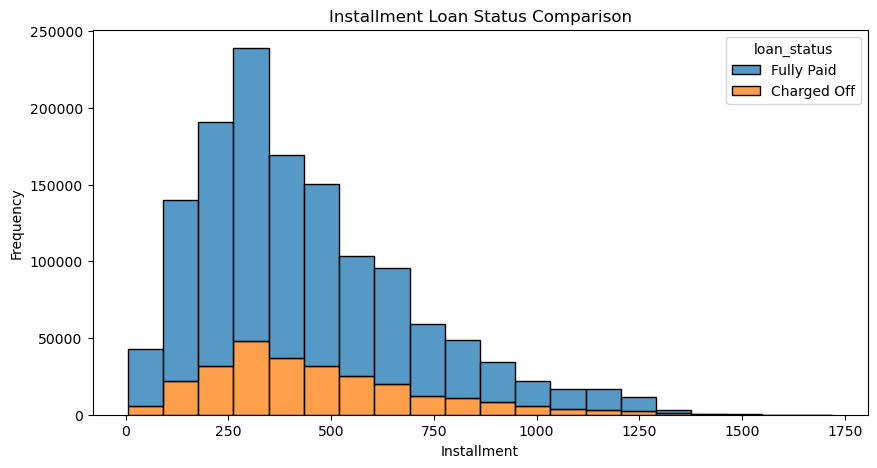

In [21]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final, x="installment", bins=20, hue="loan_status", multiple="stack")
plt.title("Installment Loan Status Comparison")
plt.xlabel("Installment")
plt.ylabel("Frequency")
plt.show()

## Observation: 
At approximately $375, it appears that the least people default when they are paying this amount of instalment. 

## Conclusion: 
The likelihood of borrowers defaulting increases when the instalment amount increase. The optimum point is at approximately $375 where least people default when they are paying that amount monthly. 


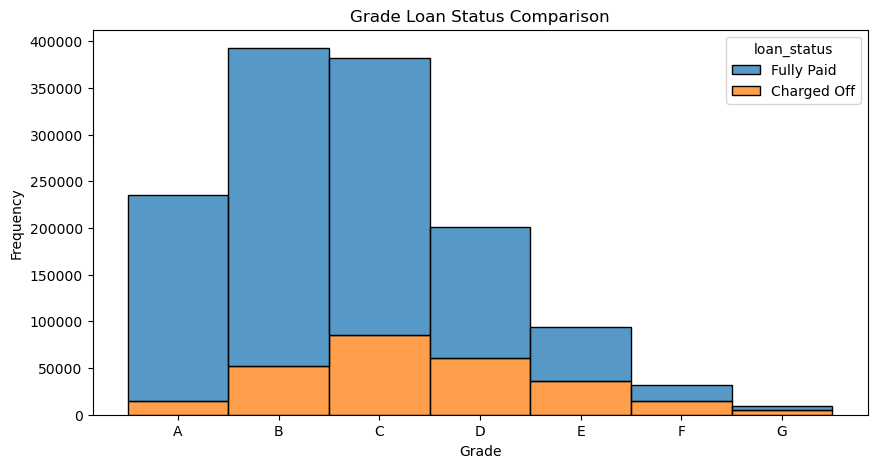

In [22]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final.sort_values("grade"), x="grade", bins=20, hue="loan_status", multiple="stack")
plt.title("Grade Loan Status Comparison")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

## Conclusion:
The likelihood of default increases when the grade of the loan decreases. 

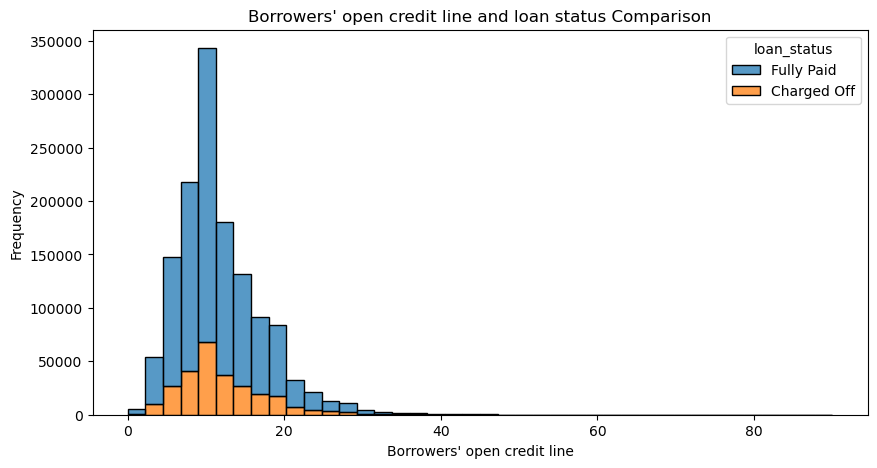

In [77]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final.sort_values("grade"), x="open_acc", bins=40, hue="loan_status", multiple="stack")
plt.title("Borrowers' open credit line and loan status Comparison")
plt.xlabel("Borrowers' open credit line")
plt.ylabel("Frequency")
plt.show()

#Open_acc: The number of open credit lines in the borrower's credit file.

## Conclusion:

The probability of being charged off decreases as the borrowers' open credit line decreases. No major discrepancies in this occurence. 

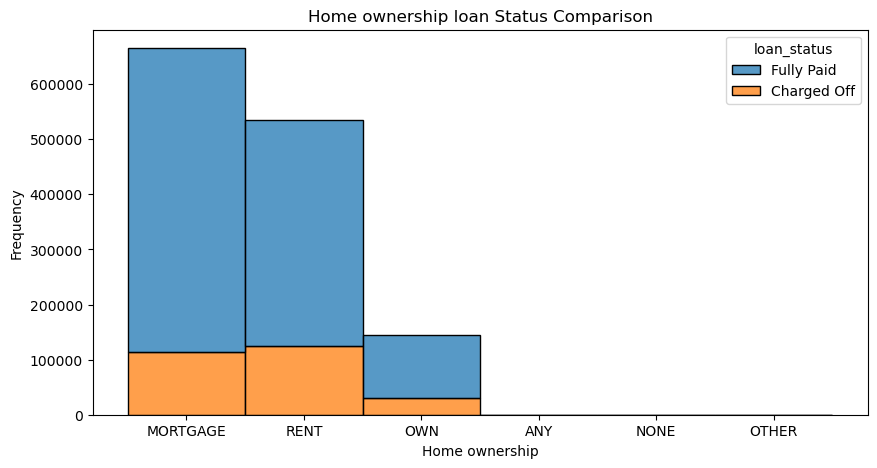

In [26]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final, x="home_ownership", bins=20, hue="loan_status", multiple="stack")
plt.title("Home ownership loan Status Comparison")
plt.xlabel("Home ownership")
plt.ylabel("Frequency")
plt.show()

## Conclusion:
Borrowers who have a mortgage are more likely to be charged off as compared to borrowers who rent and own a home/house.

## Inference:
One of the possible reasons for the higher charge off probability for mortgage holders might be related to the fact that mortgages are highly related to the interest rate. The heatmap below further investigates the relationship between interest rate, home ownership and loan status. 

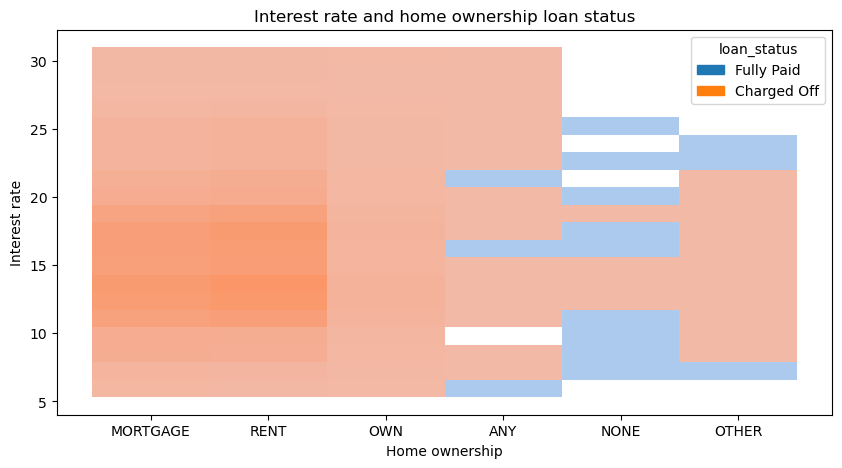

In [76]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final, x="home_ownership", y="int_rate", bins=20, hue="loan_status", multiple="stack")
plt.title("Interest rate and home ownership loan status")
plt.xlabel("Home ownership")
plt.ylabel("Interest rate")
plt.show()

## Conclusion:
When interest rate is high, borrowers who rent are more likely to be charged off as compared to borrowers with mortgage or own a home. 

There is not significant relationship between interest rate and the probability of mortgage holders defaulting. The higher probability of mortgage holders being charged off is likely to be attributed to other factors. 


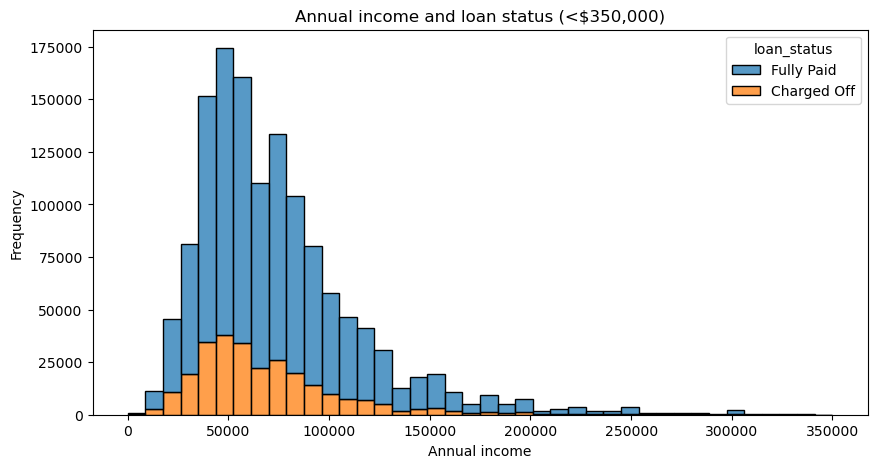

In [79]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final[df_final['annual_inc']<350000], x="annual_inc", bins=40, hue="loan_status", multiple="stack")
plt.title("Annual income and loan status (<$350,000)")
plt.xlabel("Annual income")
plt.ylabel("Frequency")

plt.show()

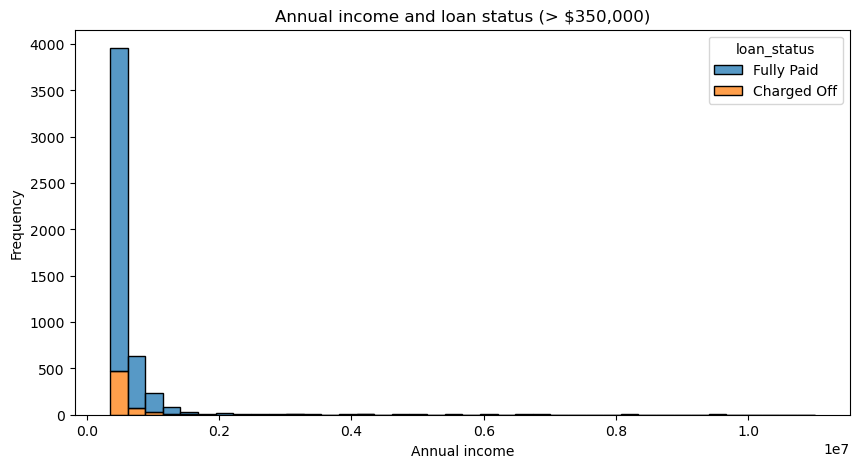

In [80]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final[df_final['annual_inc']>350000], x="annual_inc", bins=40, hue="loan_status", multiple="stack")
plt.title("Annual income and loan status (> $350,000)")
plt.xlabel("Annual income")
plt.ylabel("Frequency")

plt.show()

Due to extreme outliers, the annual income is split into two categories, i.e. <350,000 and >350,000. For better trend visualization, the grouping in this scenario is set to bins=50. This grouping may/may not affect the trend.

## Observation:
Majority of the borrowers' annual income falls in the <350,000 category, with minority borrowers having more than >350,000 annual income. The probability of default decreases as the annual income increases. Borrowers with annual income of approximately 75,000 has the least chance of being charged off. 

## Inference:
In 2015, the average median income in USA was 56,516.
Taking into account the date of the data, it is accurate that majority of the borrowers' annual income falls between 50,000 to 100,000. 

There is currently a lack of statistical reasoning to explain why borrowers with 75,000 annual income have the least risk of being charged off, therefore it might be worthwhile to look further into this. 

## Conclusion:
The probability of default decreases as the annual income increases. The optimal point lies at approximately $75,000. 


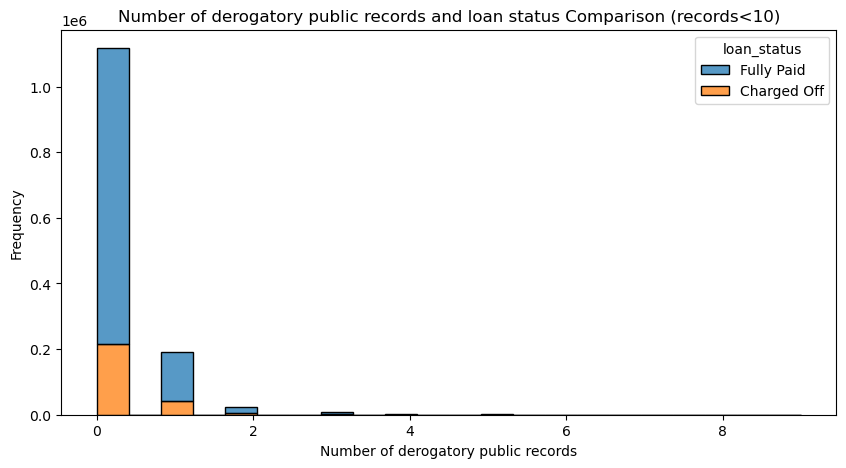

In [93]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final[df_final['pub_rec']<10], x="pub_rec", hue="loan_status", multiple="stack")
plt.title("Number of derogatory public records and loan status Comparison (records<10)")
plt.xlabel("Number of derogatory public records")
plt.ylabel("Frequency")
plt.show()

#pub_rec: Number of derogatory public records

The data set is being split into <10 and >10 for better anaylsis.

## Observation: 
Majority of the number of derogatory public records fall between 0 to 2. 
Most borrowers do not have any derogatory public records.

## Conclusion:
When the records < 10, the relationship between number of derogatory public records and loan status is weak.
See the graph below for when records > 10. 

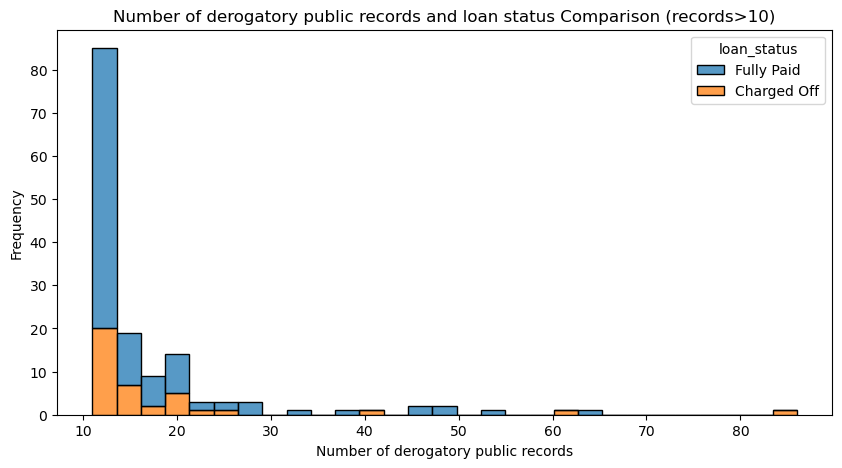

In [94]:
plt.figure(figsize=(10, 5))

sns.histplot(df_final[df_final['pub_rec']>10], x="pub_rec", hue="loan_status", multiple="stack")
plt.title("Number of derogatory public records and loan status Comparison (records>10)")
plt.xlabel("Number of derogatory public records")
plt.ylabel("Frequency")
plt.show()

## Observation:
There is a small number of people who holds more than >10 derogatory public records. 
At >10, the probability of being charged off increases when the number of records increase (approximately average of 30%). 

## Conclusion:
When the records > 10, the probability of being charged off increases when the number of records increase.